In [1]:
import OMPython

from OMPython import OMCSessionZMQ
from OMPython import ModelicaSystem

omc = OMCSessionZMQ()


In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
model_path = 'c:/Users/thogan1/Documents/GitHub/OceanEngineeringToolbox/OET.mo'


In [ ]:
mod = ModelicaSystem(model_path, 'OET.Example.multibodyWEC')
#mod = ModelicaSystem(model_path, 'OET.Experimental.pooker')

Notification: Automatically loaded package Modelica 4.0.0 due to uses annotation from OET.
Notification: Automatically loaded package Complex 4.0.0 due to uses annotation from Modelica.
Notification: Automatically loaded package ModelicaServices 4.0.0 due to uses annotation from Modelica.

Notification: Invalid unit expression 'm^2 s/rad'.



In [6]:
mod.simulate()


In [7]:
mod.getSolutions("time")

array([[0.0000e+00, 5.0000e-02, 1.0000e-01, ..., 4.9995e+02, 5.0000e+02,
        5.0000e+02]])

In [44]:
help(mod.convertMo2Fmu)

Help on method convertMo2Fmu in module OMPython:

convertMo2Fmu(
    version='2.0',
    fmuType='me_cs',
    fileNamePrefix='<default>',
    includeResources=True
) method of OMPython.ModelicaSystem instance
    This method is used to generate FMU from the given Modelica model. It creates "modelName.fmu" in the current working directory. It can be called:
    with no arguments
    with arguments of https://build.openmodelica.org/Documentation/OpenModelica.Scripting.translateModelFMU.html
    usage
    >>> convertMo2Fmu()
    >>> convertMo2Fmu(version="2.0", fmuType="me|cs|me_cs", fileNamePrefix="<default>", includeResources=true)



In [45]:
mod.convertMo2Fmu(fmuType='me')

'C:/Users/thogan1/AppData/Local/Temp/tmp1vmghsjl/OET.Experimental.multibodyWEC_er.fmu'

In [11]:
sol = mod.getQuantities()
pd.DataFrame(sol)

,name,changeable,description,variability,causality,alias,aliasvariable,start,min,max,unit
0,hydrodynamicBody.bodyShape.body.phi[1],false,Dummy or 3 angles to rotate world frame into f...,continuous,local,noAlias,None,None,None,None,rad
1,hydrodynamicBody.bodyShape.body.phi[2],false,Dummy or 3 angles to rotate world frame into f...,continuous,local,noAlias,None,None,None,None,rad
2,hydrodynamicBody.bodyShape.body.phi[3],false,Dummy or 3 angles to rotate world frame into f...,continuous,local,noAlias,None,None,None,None,rad
3,hydrodynamicBody.bodyShape.body.phi_d[1],false,= der(phi),continuous,local,noAlias,None,None,None,None,rad/s
4,hydrodynamicBody.bodyShape.body.phi_d[2],false,= der(phi),continuous,local,noAlias,None,None,None,None,rad/s
...,...,...,...,...,...,...,...,...,...,...,...
8242,world.z_arrowHead.shapeType,false,"Type of shape (box, sphere, cylinder, pipecyli...",parameter,calculatedParameter,noAlias,None,cone,None,None,None
8243,world.z_arrowLine.shapeType,false,"Type of shape (box, sphere, cylinder, pipecyli...",parameter,calculatedParameter,noAlias,None,cylinder,None,None,None
8244,world.z_label.cylinders[1].shapeType,false,"Type of shape (box, sphere, cylinder, pipecyli...",parameter,calculatedParameter,noAlias,None,cylinder,None,None,None
8245,world.z_label.cylinders[2].shapeType,false,"Type of shape (box, sphere, cylinder, pipecyli...",parameter,calculatedParameter,noAlias,None,cylinder,None,None,None


In [36]:
xPos, time = mod.getSolutions(['hydrodynamicBody.bodyShape.body.r_0[1]','time'])


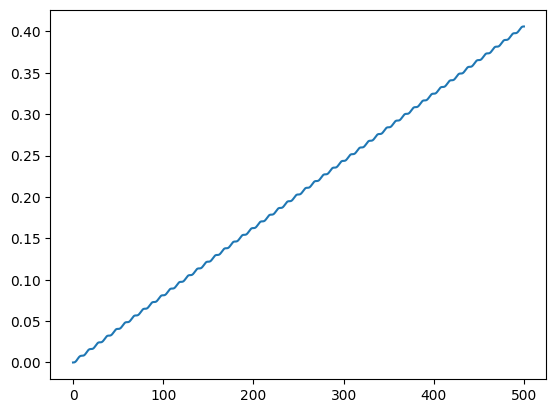

In [39]:
plt.plot(time, xPos)
plt.show()

In [38]:
print(time)

[0.0000e+00 5.0000e-02 1.0000e-01 ... 4.9995e+02 5.0000e+02 5.0000e+02]


In [66]:
from fmpy import *
fmu = 'OET.Experimental.multibodyWEC_er.fmu'
dump(fmu)

FileNotFoundError: [Errno 2] No such file or directory: 'OET.Experimental.multibodyWEC_er.fmu'

In [69]:
import fmpy
fmu = 'multibodyWEC_er.fmu'
dump(fmu)

FileNotFoundError: [Errno 2] No such file or directory: 'multibodyWEC_er.fmu'

In [67]:
fmpy.simulate_fmu(fmu)

FileNotFoundError: [Errno 2] No such file or directory: 'OET.Experimental.multibodyWEC_er.fmu'